In [131]:
###Step-by-Step Plan
###Correlation Analysis
###Feature Importance from Logistic Regression
###Feature Importance from Neural Network
###Model Optimization and Evaluation

In [132]:
# Import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE

'''import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense'''

'import tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense'

Step 1 - Correlation Analysis:

First, we'll analyze the correlations between features and the target variable (Attrition).

In [133]:
# Use this code if we are importing csv via SQL
'''# Establish the connection to postgres database
conn = psycopg2.connect(database = "project_4",
                        user = "postgres",
                        password = postgres_password,
                        host = "localhost",
                        port = "5432"
)

# Import and read the employee_attrition.csv from SQL
attrition_df = pd.read_sql_query(SELECT * FROM attrition, conn)

# Close the connection
conn.close()'''

'# Establish the connection to postgres database\nconn = psycopg2.connect(database = "project_4",\n                        user = "postgres",\n                        password = postgres_password,\n                        host = "localhost",\n                        port = "5432"\n)\n\n# Import and read the employee_attrition.csv from SQL\nattrition_df = pd.read_sql_query(SELECT * FROM attrition, conn)\n\n# Close the connection\nconn.close()'

In [134]:
# create path to csv
file_path = Path("Resources/employee_attrition.csv")

# Load dataset
attrition_df = pd.read_csv(file_path)

# Review dataframe
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [135]:
# Drop unnecessary and redundant columns
del attrition_df["EmployeeCount"]
del attrition_df["EmployeeNumber"]
del attrition_df["Over18"]
del attrition_df["StandardHours"]

attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [136]:
# Create a custum function to encode binary columns
def encode_column(column):
    if (column == "Yes") | (column == "Male"):
        return 1
    else:
        return 0

In [137]:
# Apply custom function to columns with binary data
attrition_df["Attrition"] = attrition_df["Attrition"].apply(encode_column)
attrition_df["Gender"] = attrition_df["Gender"].apply(encode_column)
attrition_df["OverTime"] = attrition_df["OverTime"].apply(encode_column)
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2


In [138]:
# Encode categorical data to numeric with "pd.get_dummies"
converted_df = pd.get_dummies(attrition_df, columns=["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus"], dtype="int")
converted_df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,1,0,0,0,0,0,0,0,1,0


Attrition                            1.000000
OverTime                             0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
EducationField_Human Resources       0.036466
JobRole_Human Resources              0.036215
Gender                               0.029453
JobRole_Sales Executive              0.019774
Department_Human Resources           0.016832
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
PercentSalaryHike                   -0.013478
EducationField_Other              

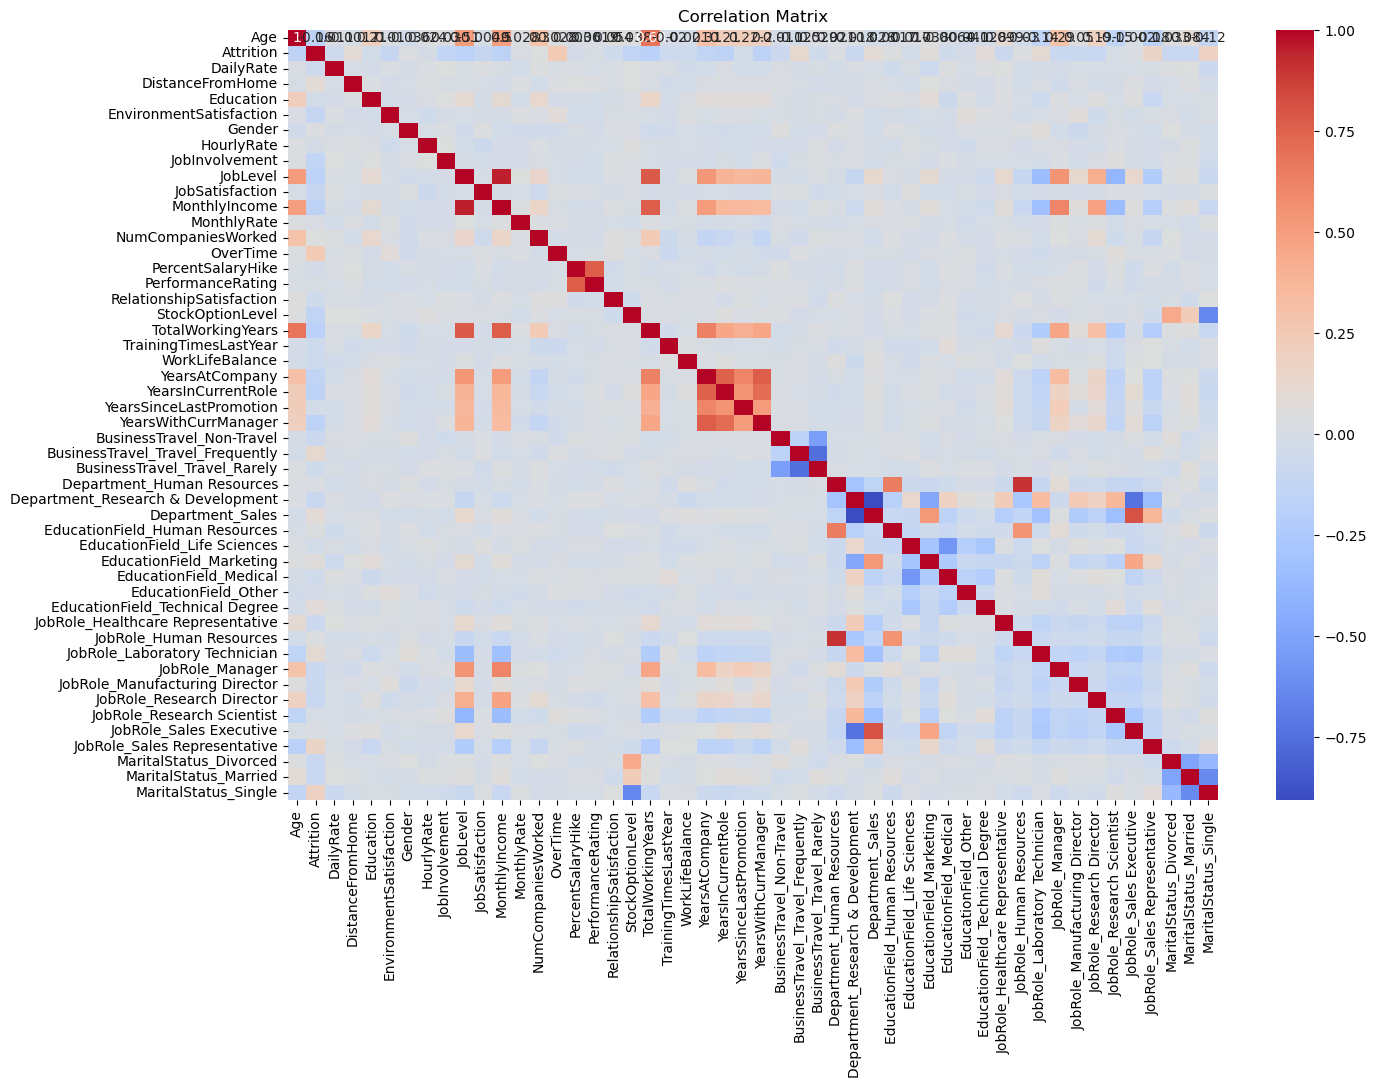

In [139]:
# Compute the correlation matrix
corr_matrix = converted_df.corr()

# Correlation with target variable 'Attrition_Yes'
corr_target = corr_matrix['Attrition'].sort_values(ascending=False)
print(corr_target)

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Step 2 - Feature Importance from Logistic Regression:

We'll use Logistic Regression to identify the most influential features.

In [140]:
# Split our preprocessed data into our features and target arrays
y = converted_df["Attrition"]
X = converted_df.drop(columns=["Attrition"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=1,
                                                    stratify=y)

In [141]:
# Review targets
pd.DataFrame(y).head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [142]:
# Review features
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,0,94,3,2,4,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,3,1,61,2,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,1,92,2,1,3,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,0,56,3,1,3,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,1,40,3,1,2,...,1,0,0,0,0,0,0,0,1,0


In [143]:
# Create logistic regerssion model
model = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
model

LogisticRegression(max_iter=200, random_state=1)

In [144]:
# Fit training data to model
model.fit(X_train, y_train)

c:\Users\danie\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=1)

In [145]:
# Make predictions on testing data
predictions = model.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [146]:
# Display the accuracy score for the test dataset.
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, predictions)}")

Logistic Regression Accuracy: 0.8288043478260869


In [147]:
# Print the classification report for the model
target_names = ["Attrition", "No Attrition"]
print(classification_report(y_test, predictions, target_names = target_names))

              precision    recall  f1-score   support

   Attrition       0.84      0.98      0.91       309
No Attrition       0.17      0.02      0.03        59

    accuracy                           0.83       368
   macro avg       0.50      0.50      0.47       368
weighted avg       0.73      0.83      0.77       368



In [148]:
# Generate the confusion matrix for the model
confusion_matrix(y_test, predictions)

array([[304,   5],
       [ 58,   1]], dtype=int64)

In [149]:
# Calculate model coefficients, for feature importance
coefs = model.coef_[0]
coefs

array([-2.17353316e-02, -6.49186788e-05,  4.14923077e-02,  3.11859433e-02,
       -1.59759618e-01,  3.47366170e-02,  8.60800659e-03, -1.09980566e-01,
       -8.74295593e-03, -1.51242739e-01, -1.68002647e-04,  2.31460074e-05,
        1.92051984e-01,  1.15913470e-01, -6.30399219e-03,  7.02541166e-03,
       -4.41501813e-02, -1.37270512e-01,  7.05459562e-03, -9.72859492e-02,
       -6.89041828e-02,  8.74069613e-02, -1.33990574e-01,  1.61780088e-01,
       -1.41183858e-01, -2.82256598e-02,  4.74556940e-02, -1.71838146e-02,
        1.21491965e-02, -5.26019273e-02,  4.24989503e-02,  9.82133963e-03,
       -3.76107458e-02,  2.43591306e-02, -1.96866831e-02, -6.11888408e-03,
        3.12820624e-02, -1.57845461e-02,  1.33336085e-02,  2.28761980e-02,
       -2.23120512e-03, -1.65972024e-02, -6.09146349e-03, -3.42517115e-02,
        1.38660017e-02,  2.69265400e-02, -5.04987826e-02, -3.52082465e-02,
        8.77532486e-02])

In [150]:
# Create feature importance dataframe
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefs)}).sort_values('Importance', ascending=False).reset_index(drop=True)
feature_importance_df.head()

,Feature,Importance
0,NumCompaniesWorked,0.192052
1,YearsSinceLastPromotion,0.161780
2,EnvironmentSatisfaction,0.159760
3,JobSatisfaction,0.151243
4,YearsWithCurrManager,0.141184


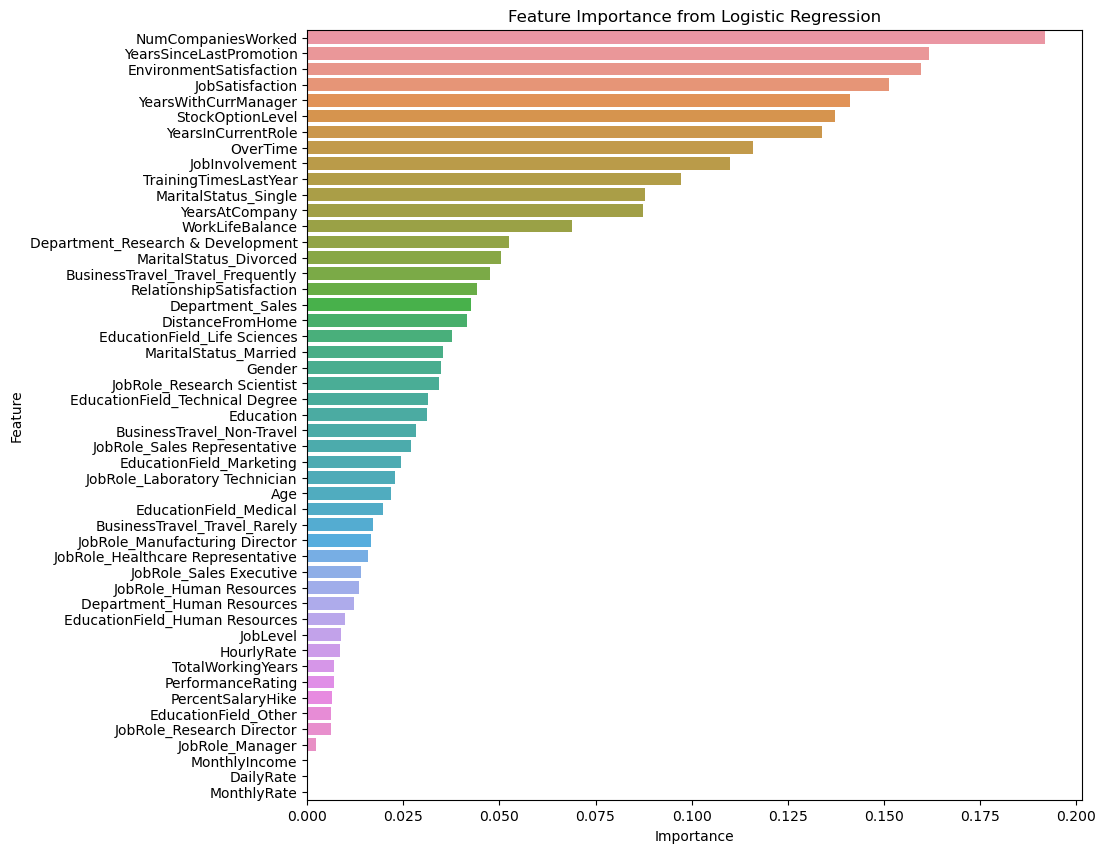

In [151]:
# Plot feature importance
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Logistic Regression')
plt.savefig("output/feature_importance_from_lr", bbox_inches = 'tight')
plt.show()


Step 3 - Feature Importance from Neural Network:

We'll train a Neural Network and use permutation importance to identify the most influential features.

In [152]:
'''# Build neural network
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

# Compile model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model
loss, accuracy_nn = model_nn.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network Accuracy: {accuracy_nn}")

# Permutation importance
results = permutation_importance(model_lr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
importance_nn = results.importances_mean

# Feature importance DataFrame
feature_importance_nn = pd.DataFrame({'Feature': X.columns, 'Importance': importance_nn})
feature_importance_nn = feature_importance_nn.sort_values(by='Importance', ascending=False)
print(feature_importance_nn)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_nn)
plt.title('Feature Importance from Neural Network')
plt.show()'''


'# Build neural network\nmodel_nn = Sequential()\nmodel_nn.add(Dense(64, input_dim=X_train.shape[1], activation=\'relu\'))\nmodel_nn.add(Dense(32, activation=\'relu\'))\nmodel_nn.add(Dense(1, activation=\'sigmoid\'))\n\n# Compile model\nmodel_nn.compile(optimizer=\'adam\', loss=\'binary_crossentropy\', metrics=[\'accuracy\'])\n\n# Train model\nmodel_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)\n\n# Evaluate model\nloss, accuracy_nn = model_nn.evaluate(X_test, y_test, verbose=0)\nprint(f"Neural Network Accuracy: {accuracy_nn}")\n\n# Permutation importance\nresults = permutation_importance(model_lr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)\nimportance_nn = results.importances_mean\n\n# Feature importance DataFrame\nfeature_importance_nn = pd.DataFrame({\'Feature\': X.columns, \'Importance\': importance_nn})\nfeature_importance_nn = feature_importance_nn.sort_values(by=\'Importance\', ascending=False)\nprint(feature_importance_nn)\n\n

Step 4: Model Optimization and Evaluation

We will optimize the models using grid search for Logistic Regression and early stopping for Neural Network, then evaluate the results.

In [153]:
# Logistic regression optimisation
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Grid search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model evaluation
best_model_lr = grid_search.best_estimator_
y_pred_best_lr = best_model_lr.predict(X_test)
accuracy_best_lr = accuracy_score(y_test, y_pred_best_lr)
print(f"Optimized Logistic Regression Accuracy: {accuracy_best_lr}")
print("Optimized Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_best_lr))


c:\Users\danie\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\danie\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Optimized Logistic Regression Accuracy: 0.8641304347826086
Optimized Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       309
           1       0.67      0.31      0.42        59

    accuracy                           0.86       368
   macro avg       0.77      0.64      0.67       368
weighted avg       0.85      0.86      0.84       368



c:\Users\danie\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [155]:
# Hyperparameter tuning using Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 500, 1000]
}

grid_search = GridSearchCV(LogisticRegression(random_state=1), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_selected, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Evaluate best model
best_train_score = best_model.score(X_train_selected, y_train)
best_test_score = best_model.score(X_test_selected, y_test)
print(f"Best Model Training Score: {best_train_score}")
print(f"Best Model Testing Score: {best_test_score}")

# Make predictions and evaluate best model
best_predictions = best_model.predict(X_test_selected)
print(f"Best Model Accuracy Score: {accuracy_score(y_test, best_predictions)}")
print(f"Best Model Confusion Matrix:\n{confusion_matrix(y_test, best_predictions)}")
print(f"Best Model Classification Report:\n{classification_report(y_test, best_predictions, target_names=['Attrition', 'No Attrition'])}")


NameError: name 'X_train_selected' is not defined

In [156]:
# Calculate permutation importance
perm_importance = permutation_importance(best_model, X_test_selected, y_test, n_repeats=10, random_state=1)

# Feature importance DataFrame
perm_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
print(perm_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Importance')
plt.show()


NameError: name 'best_model' is not defined

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 fe

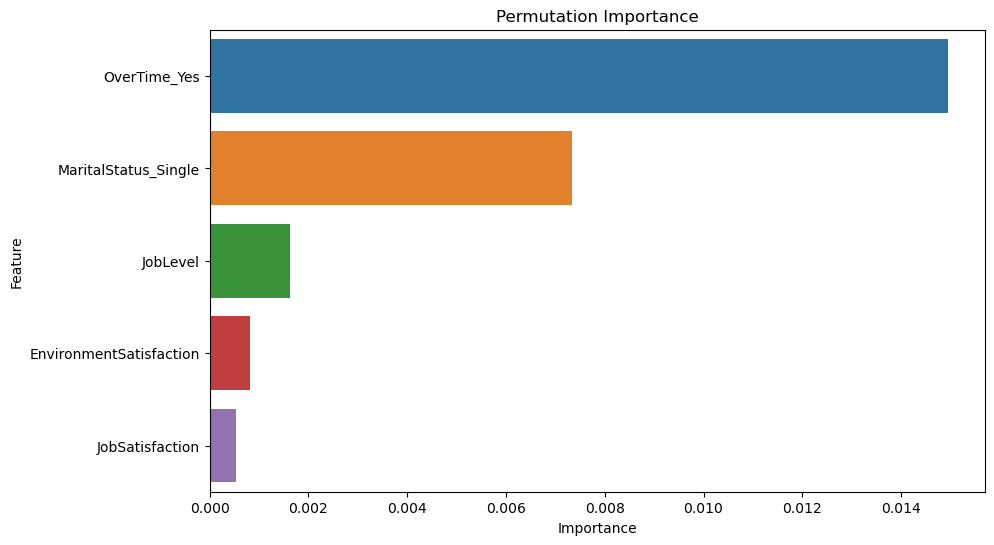

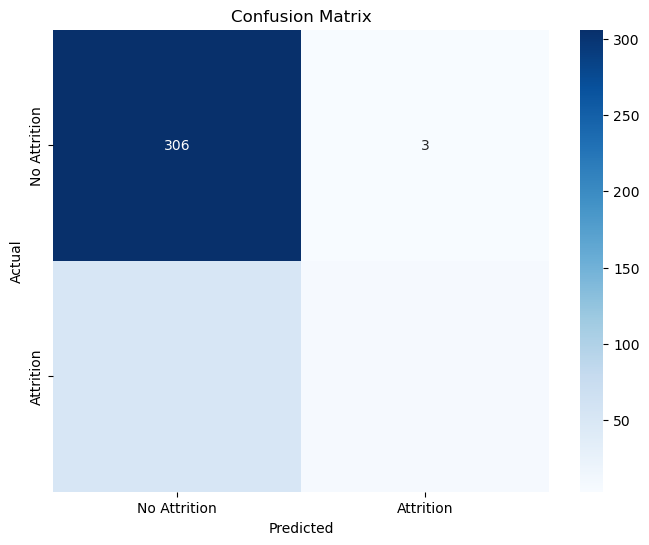

In [ ]:
# Load dataset
file_path = Path("Resources/employee_attrition.csv")
data = pd.read_csv(file_path)

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Prepare features and target
X = data_encoded.drop(columns=['Attrition_Yes'])
y = data_encoded['Attrition_Yes']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=1)
model.fit(X_train, y_train)

# Feature selection using RFE
rfe = RFE(estimator=model, n_features_to_select=5, verbose=1)
rfe.fit(X_train, y_train)

X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

selected_features = X.columns[rfe.get_support()]
print(f"Selected features: {', '.join(selected_features)}")

# Train the model with selected features
model.fit(X_train_selected, y_train)

# Hyperparameter tuning using Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 500, 1000]
}

grid_search = GridSearchCV(LogisticRegression(random_state=1), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_selected, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Evaluate best model
best_train_score = best_model.score(X_train_selected, y_train)
best_test_score = best_model.score(X_test_selected, y_test)
print(f"Best Model Training Score: {best_train_score}")
print(f"Best Model Testing Score: {best_test_score}")

# Make predictions and evaluate best model
best_predictions = best_model.predict(X_test_selected)
print(f"Best Model Accuracy Score: {accuracy_score(y_test, best_predictions)}")
print(f"Best Model Confusion Matrix:\n{confusion_matrix(y_test, best_predictions)}")
print(f"Best Model Classification Report:\n{classification_report(y_test, best_predictions, target_names=['Attrition', 'No Attrition'])}")

# Calculate permutation importance
perm_importance = permutation_importance(best_model, X_test_selected, y_test, n_repeats=10, random_state=1)

# Feature importance DataFrame
perm_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
print(perm_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Importance')
plt.show()

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, best_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Summary

By following these steps, we will:

Perform a correlation analysis to understand the relationships between features and the target.

Identify feature importance using Logistic Regression and visualize it.

Train and evaluate a Neural Network, using permutation importance for feature analysis.

Optimize both models using grid search and early stopping, respectively, and evaluate the results.

This comprehensive approach will provide multiple perspectives on feature importance and help you build well-optimized predictive models.